# <font color= "magenta">  ****Random agent vs Smart (Rule-based) agent****</font>

**1. Import required libraries**

In [1]:
import time
import random
import numpy as np
from Connect4 import Connect4
from RandomAgent import RandomAgent
from RuleBasedAgent import RuleBasedAgent

**2. Play game**

In [2]:
def play_game(verbose=False):
    game = Connect4()
    random_agent = RandomAgent(game)
    rule_based = RuleBasedAgent(game)     
    while True:
        if verbose:
            game.display_board()
            available_cols = game.get_available_moves(game.board)
            print(f"Available columns: {available_cols}")

        if game.current_player == "●":
            col = col = random_agent.random_agent_move(game.board)
            if verbose:
                print("Random AI's turn")
                print(f"Random AI chooses column: {col}")
        else:
            col = rule_based.rule_based_agent(game.board)
            if verbose:
                print("Rule Based AI's turn")
                print(f"Rule Based AI chooses column: {col}")

        if col is None:
            return "draw"

        game.make_move(col, game.current_player)

        if game.check_winner("○"):
            return "rule_based"
        elif game.check_winner("●"):
            return "random"
        elif game.is_full(game.board):
            return "draw"

        game.current_player = "○" if game.current_player == "●" else "●"

**3. Run Game funcion**

In [3]:
if __name__ == "__main__":
    start_time = time.time()
    random_wins = 0
    rule_based_wins = 0
    draws = 0
    total_games = 500

    for i in range(total_games):
        game_result = play_game()
        if game_result == "random":
            random_wins += 1
        elif game_result == "rule_based":
            rule_based_wins += 1
        else:
            draws += 1

    end_time = time.time()
    duration = end_time - start_time

    print("----Random agent vs Smart (Rule-based) agent----")
    print(f"\nResults after {total_games} games:")
    print(f"Random Agent wins: {random_wins}")
    print(f"Rule-Based Agent wins: {rule_based_wins}")
    print(f"Draws: {draws}")
    print(f"Total time taken: {duration:.2f} seconds")

----Random agent vs Smart (Rule-based) agent----

Results after 500 games:
Random Agent wins: 25
Rule-Based Agent wins: 473
Draws: 2
Total time taken: 11.61 seconds


**4. Import library for Visualisation**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
results = {
        "Random Wins": random_wins,
        "Rule-Based Wins": rule_based_wins,
        "Draws": draws
    }

**5. Bar Chart**

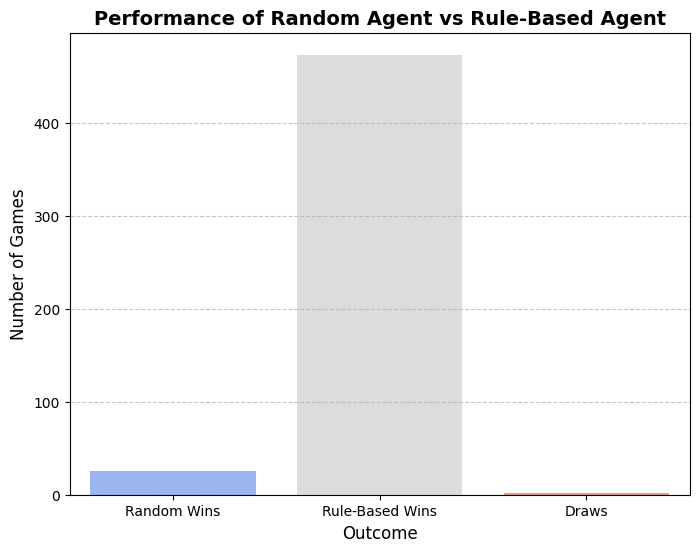

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(results.keys()),
    y=list(results.values()),
    hue=list(results.keys()),
    palette="coolwarm",
)
plt.title("Performance of Random Agent vs Rule-Based Agent", fontsize=14, weight="bold")
plt.ylabel("Number of Games", fontsize=12)
plt.xlabel("Outcome", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**6. Pie Chart**

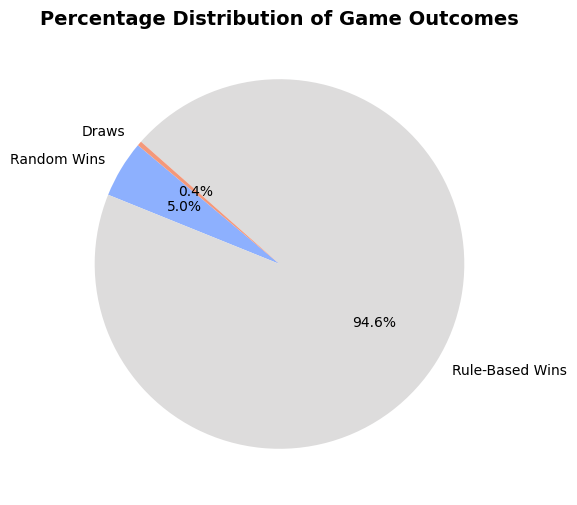

In [9]:
plt.figure(figsize=(8, 6))
plt.pie(
    results.values(),
    labels=results.keys(),
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("coolwarm", len(results))
)
plt.title("Percentage Distribution of Game Outcomes", fontsize=14, weight="bold")
plt.show()